# Backpropgation #

Let’s start with a simplified forward pass with just one neuron. Rather than backpropagating from the loss function for a full neural network, let’s backpropagate the ReLU function for a single neuron and act as if we intend to minimize the output for this single neuron. 

Since minimizing the output from a ReLU activated neuron doesn’t serve any purpose other than as an exercise so take it as a demonstration of the work. Minimizing the loss value is our end goal, but in this case, we’ll start by showing how we can leverage the chain rule with derivatives and partial derivatives to calculate the impact of each variable on the ReLU activated output. We’ll also start by minimizing this more basic output before jumping to the full network and overall loss.

Just a recap of an tomic forward operations over 3 inputs, which means that it also has 3 weights and a bias:

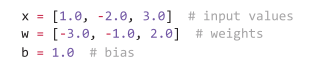


The single atomic operation would be:

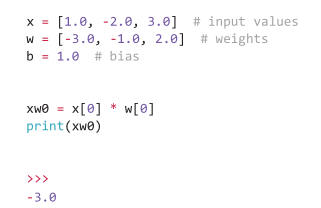

and visual element would be:

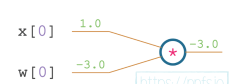

So the complete code all the input neurons values would be:
    

In [2]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias


# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

print(xw0, xw1, xw2)

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print(z)



-3.0 2.0 6.0
6.0


Visually the operation would be:

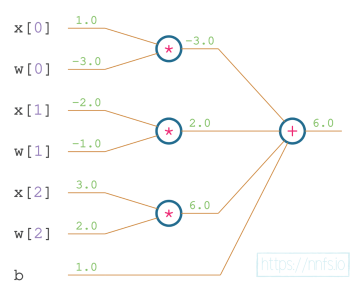

Finally we apply Relu for the output:


In [3]:
# ReLU activation function
y = max(z, 0)
print(y)

6.0


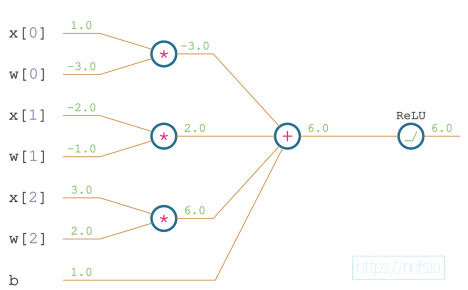

The above is a full forward pass through a single neuron and a ReLU activation function. For the moment we can treat all of these chained functions as one big function which takes input values (x), weights (w), and bias (b), as inputs, and outputs y. 

This big function consists of multiple simpler functions for example there is a multiplication of input values and weights, sum of these values and bias, as well as a max function as the ReLU activation — 3 chained functions in total:

# Steps: #

1. The first step is to backpropagate our gradients by calculating derivatives and partial derivatives with respect to each of our parameters and inputs with the help of chain rule.

Recall that the chain rule for a function stipulates that the derivative for nested functions like f(g(x)) solves to:

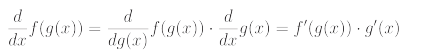


The above mentioned big function that we just mentioned can be, described loosely interpreted as:

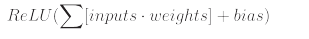

or in coding form:




So the current task is calculating the impact of each of the inputs, weights, and a bias over output. We’ll start by considering what we need to calculate for the partial derivative of w0, for example. But first, let’s rewrite our equation to the form that will allow us to determine how to calculate the derivatives more easily:


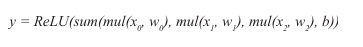


The above equation contains 3 nested functions: ReLU, a sum of weighted inputs and a bias, and multiplications of the inputs and weights. To calculate the impact of the example weight, w0, on the output, the chain rule tells us to calculate the derivative of ReLU with respect to its parameter:
1. which is the sum,
2. then multiply it with the partial derivative of the sum operation with respect to its mul(x0, w0) input, as this input contains the parameter in question. 
3. Then, multiply this with the partial derivative of the multiplication operation with respect to the x0 input. 

Let’s see this in a simplified equation:


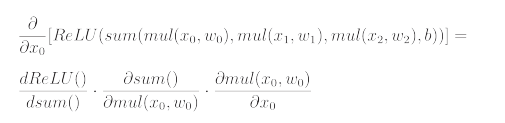

For legibility, we did not denote the ReLU() parameter, which is the full sum, and the sum parameters, which are all of the multiplications of inputs and weights. 

We excluded this because the equation would be longer and harder to read. This equation shows that we have to calculate the derivatives and partial derivatives of all of the atomic operations and multiply them to acquire the impact that x0 makes on the output. 

We can then repeat this to calculate all of the other remaining impacts. The derivatives with respect to the weights and a bias will inform us about their impact and will be used to update these weights and bias. The derivatives with respect to inputs are used to chain more layers by passing them to the previous function in the chain.



For a simple Neural network We’ll have multiple chained layers of neurons in the model, followed by the loss function. We want to know the impact of a given weight or bias on the loss. That means that we will have to calculate the derivative of the loss function and apply the chain rule with the derivatives of all activation functions and neurons in all of the consecutive layers. 


### Note ####

The derivative with respect to the layer’s inputs, as opposed to the derivative with respect to the weights and biases, is not used to update any parameters. Instead, it is used to
chain to another layer (which is why we backpropagate to the previous layer in a chain).

During the backward pass, we’ll calculate the derivative of the loss function, and use it to multiply with the derivative of the activation function of the output layer, then use this result to multiply by the derivative of the output layer, and so on, through all of the hidden layers and activation functions. "Can be called as backward multiplication system"


Inside these layers, the derivative with respect to the weights and biases will form the gradients that we’ll use to update the weights and biases. The derivatives with respect to inputs will form the gradient to chain with the previous layer. This can calculate the impact of its weights and biases on the loss and backpropagate gradients on inputs further.


# Example #

For this example, let’s assume that our neuron receives a gradient of 1 from the next layer. We’re making up this value for demonstration purposes, and a value of 1 won’t change the values, which means that we can more easily show all of the processes. We are going to use the color of red for derivatives:

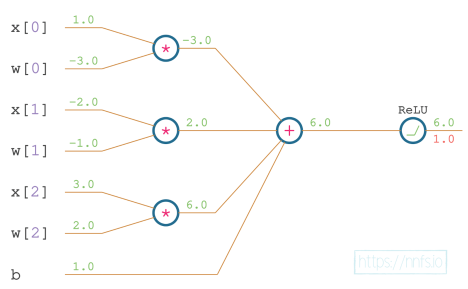



Recall that the derivative of ReLU() with respect to its input is 1, if the input is greater than 0, and 0 otherwise:

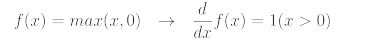

We can write that in Python as:


In [4]:
drelu_dz = (1. if z > 0 else 0.)

Where the drelu_dz means the derivative of the ReLU function with respect to z.

we used z instead of x from the equation since the equation denotes the max function in general, and we are applying it to the neuron’s output, which is z.

The input value to the ReLU function is 6, so the derivative equals 1. We have to use the chain rule and multiply this derivative with the derivative received from the next layer, which is 1 for the purpose of this example:

In [5]:
# Forward pass

x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)


# Backward pass
# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)

print(drelu_dz)

1.0


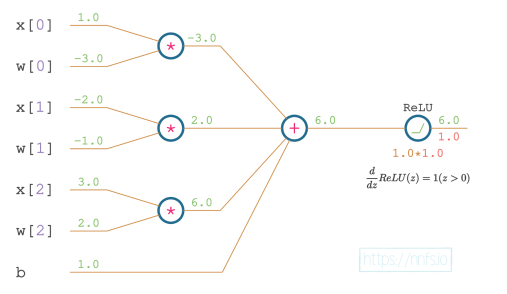

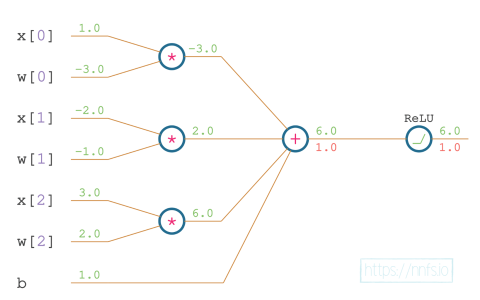

Moving backward through our neural network, what is the function that comes immediately before we perform the activation function?

It’s a sum of the weighted inputs and bias. This means that we — want to calculate the partial derivative of the sum function, and then, using the chain rule, multiply this by the partial derivative of the subsequent, outer, function, which is ReLU. We’ll call these results the:

- drelu_dxw0 — the partial derivative of the ReLU w.r.t. the first weighed input, w0x0,
- drelu_dxw1 — the partial derivative of the ReLU w.r.t. the second weighed input, w1x1,
- drelu_dxw2 — the partial derivative of the ReLU w.r.t. the third weighed input, w2x2,
- drelu_db — the partial derivative of the ReLU with respect to the bias, b.

The partial derivative of the sum operation is always 1, no matter the inputs:

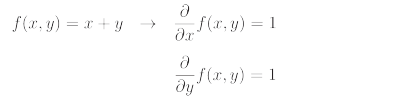


The weighted inputs and bias are summed at this stage. So we will calculate the partial derivatives of the sum operation with respect to each of these, multiplied by the partial derivative for the subsequent function (using the chain rule), which is the ReLU function, denoted by drelu_dz.

The first partial derivative:
- dsum_dxw0 = 1
- drelu_dxw0 = drelu_dz * dsum_dxw0

To be clear, the dsum_dxw0 above means the partial derivative of the sum with respect to the x (input), weighted, for the 0th pair of inputs and weights. 1 is the value of this partial derivative, which we multiply, using the chain rule, with the derivative of the subsequent function, which is the ReLU function.


Again, we have to apply the chain rule and multiply the derivative of the ReLU function with the partial derivative of the sum, with respect to the first weighted input:


In [6]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)

# Backward pass

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
print(drelu_dxw0)

1.0
1.0


Partial derivative of the sum function w.r.t. the first weighted input; the chain rule.
  
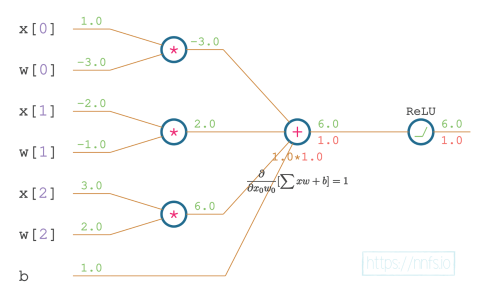


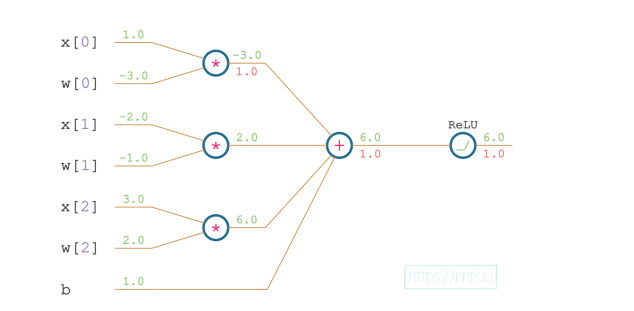



Partial derivative of the sum function w.r.t. the second weighted input; the chain rule.

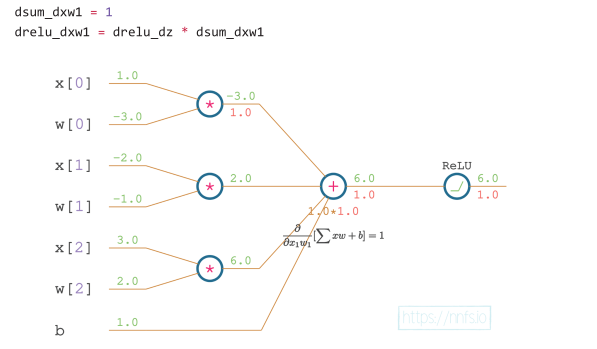

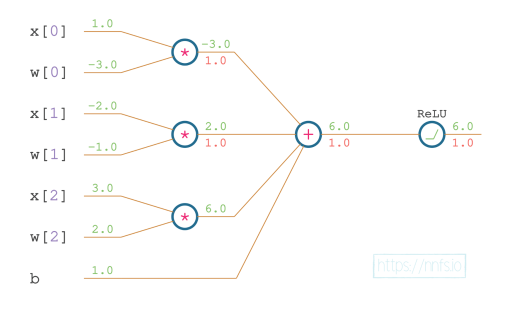


Partial derivative of the sum function w.r.t. the third weighted input; the chain rule.

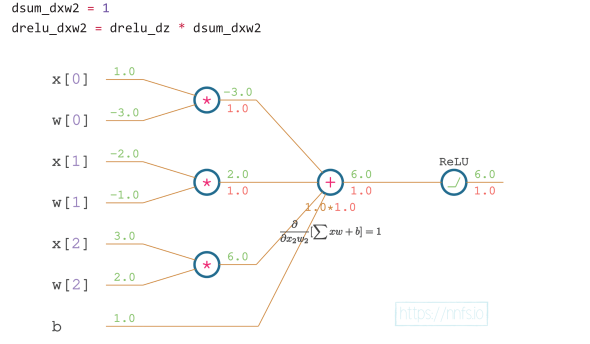

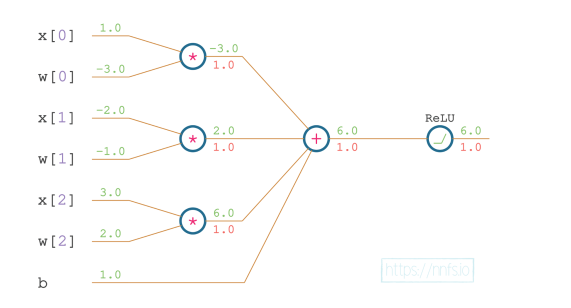


Partial derivative of the sum function w.r.t. the bias; the chain rule.

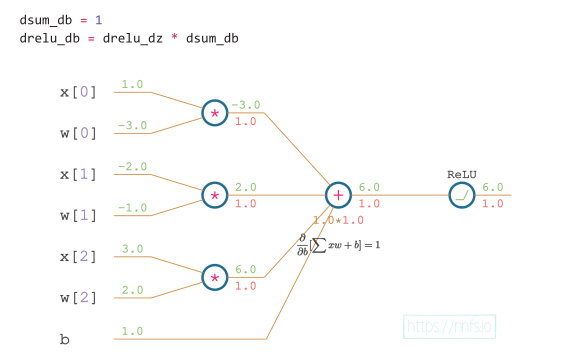

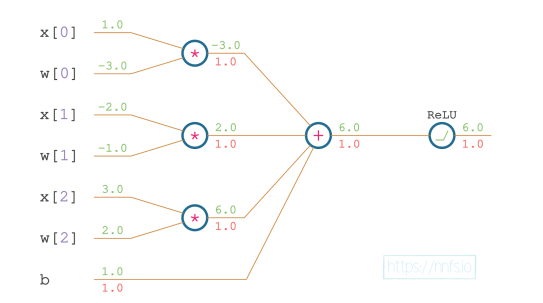



In [7]:
# Let’s add these partial derivatives, with the applied chain rule, to our code:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)


# Backward pass

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

1.0
1.0 1.0 1.0 1.0
